In [0]:
# https://towardsdatascience.com/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21
from google.colab import drive
drive.mount('/content/gdrive') 
import pandas as pd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = '/content/gdrive/My Drive/BT4222 project/filteredlistings.csv'
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43630,37186053.0,https://www.airbnb.com/rooms/37186053,2.019120e+13,2019-12-05,"Clean, Calming Retreat in Williamsburg – By Su...","Bright, clean 1 bedroom, just steps from the ...","The building is small, housing just a few unit...","Bright, clean 1 bedroom, just steps from the ...",none,Ideally located just three stops into Brooklyn...,NaN,"The Graham L is just steps away, at the end of...",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b3a56d91-1...,NaN,1389552,https://www.airbnb.com/users/show/1389552,Nina,2011-11-09,"New York, New York, United States",I am an experience designer and avid traveller!,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/1389552/profi...,https://a0.muscache.com/im/users/1389552/profi...,Williamsburg,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Brooklyn, NY, United States",Williamsburg,...,$0.00,4.0,1125,4.0,4.0,1125,1125,4.0,1125.0,2 weeks ago,t,6.0,6.0,6.0,6.0,2019-12-05,3.0,3.0,2019-08-19,2019-11-08,100.0,10.0,10.0,9.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,0.83
1,22614,19609919.0,https://www.airbnb.com/rooms/19609919,2.019120e+13,2019-12-05,Large Private Room in Duplex- Chelsea,BEAUTIFUL duplex in right in the heart of Chel...,This private room is the bottom floor of the d...,BEAUTIFUL duplex in right in the heart of Chel...,none,The apartment is conveniently located in the h...,NaN,NaN,Guests will have access to the common area spa...,I will be traveling and have a co-host take ca...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8e69a702-a...,NaN,137893214,https://www.airbnb.com/users/show/137893214,Chad,2017-06-30,US,I am a recent graduate of the Zicklin School o...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/89bba...,https://a0.muscache.com/im/pictures/user/89bba...,Chelsea,1.0,1.0,"['email', 'phone']",t,f,"New York, NY, United States",Manhattan,...,$0.00,2.0,1125,2.0,2.0,1125,1125,2.0,1125.0,29 months ago,t,0.0,0.0,0.0,0.0,2019-12-05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1.0,0.0,1.0,0.0,NaN
2,3306,2144033.0,https://www.airbnb.com/rooms/2144033,2.019120e+13,2019-12-06,Williamsburg - country house in NYC,"No risk, legal Airbnb rental in private reside...","Great location, breakfast included! Located i...","No risk, legal Airbnb rental in private reside...",none,Williamsburg - Artistic neighborhood with a lo...,"On street parking, but be mindful of alternate...",Very convenient to public transportation. On s...,The room itself is cozy and peaceful with sout...,My husb

In [0]:
df.info()
df = df.drop([398,399,3362,3363])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Columns: 107 entries, Unnamed: 0 to reviews_per_month
dtypes: float64(30), object(77)
memory usage: 8.2+ MB


In [0]:
from collections import Counter
results = Counter()
df['amenities'].str.strip('{}').str.replace('"', '').str.lstrip('\"').str.rstrip('\"').str.split(',').apply(results.update)

print(results.most_common(30))

[('Wifi', 9768), ('Heating', 9376), ('Essentials', 9246), ('Kitchen', 9073), ('Smoke detector', 8690), ('Air conditioning', 8575), ('Hangers', 7521), ('Carbon monoxide detector', 7064), ('Shampoo', 6847), ('TV', 6832), ('Hair dryer', 6710), ('Laptop friendly workspace', 6372), ('Iron', 6324), ('Hot water', 5377), ('Refrigerator', 4127), ('Washer', 3943), ('Dryer', 3877), ('Fire extinguisher', 3805), ('Dishes and silverware', 3780), ('Lock on bedroom door', 3729), ('First aid kit', 3454), ('Stove', 3450), ('Microwave', 3419), ('Oven', 3342), ('Free street parking', 3276), ('Cooking basics', 3266), ('Bed linens', 3262), ('Coffee maker', 3050), ('Elevator', 2763), ('Internet', 2752)]


Text(0.5, 0, 'Count')

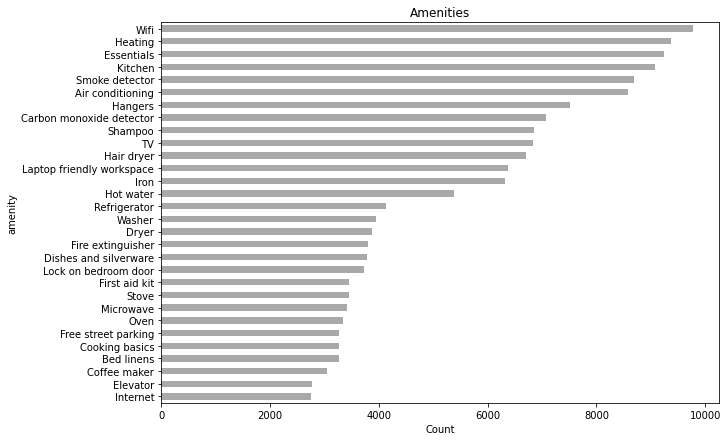

In [0]:
import matplotlib.pyplot as plt
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
# plot the Top 20
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',figsize=(10,7), legend=False, color='darkgrey',title='Amenities')
plt.xlabel('Count')

In [0]:
df['Hair_dryer'] = df['amenities'].str.contains('Hair Dryer')
df['TV'] = df['amenities'].str.contains('TV')
df['Washer'] = df['amenities'].str.contains('Washer')
df['Microwave'] = df['amenities'].str.contains('Microwave')
df['Shampoo'] = df['amenities'].str.contains('Shampoo')
df['Free_street_parking'] = df['amenities'].str.contains('Free street parking')
df['Cooking_basics'] = df['amenities'].str.contains('Cooking basics')
df['Kitchen'] = df['amenities'].str.contains('Kitchen')
df['Iron'] = df['amenities'].str.contains('Iron')
df['Lock_on_bedroom_door'] = df['amenities'].str.contains('Lock on bedroom door')
df['Washer'].head(10)

0     True
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8     True
9    False
Name: Washer, dtype: bool

In [0]:
import numpy as np
df.Hair_dryer = np.where(df.Hair_dryer == True, 1, 0)
df.TV = np.where(df.TV == True, 1, 0)
df.Washer = np.where(df.Washer == True, 1, 0)
df.Microwave = np.where(df.Microwave == True, 1, 0)
df.Shampoo = np.where(df.Shampoo == True, 1, 0)
df.Free_street_parking = np.where(df.Free_street_parking == True, 1, 0)
df.Cooking_basics = np.where(df.Cooking_basics == True, 1, 0)
df.Kitchen = np.where(df.Kitchen == True, 1, 0)
df.Iron = np.where(df.Iron == True, 1, 0)
df.Lock_on_bedroom_door = np.where(df.Lock_on_bedroom_door == True, 1, 0)
df['Washer'].head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    1
9    0
Name: Washer, dtype: int64

In [0]:
df.host_is_superhost = np.where(df.host_is_superhost == 't', 1, 0)
df['host_is_superhost']

0        0
1        0
2        1
3        0
4        0
        ..
9997     1
9998     0
9999     1
10000    0
10001    0
Name: host_is_superhost, Length: 10002, dtype: int64

In [0]:
df.host_identity_verified = np.where(df.host_identity_verified == 't', 1, 0)
df['host_identity_verified']

0        1
1        0
2        1
3        0
4        0
        ..
9997     0
9998     1
9999     0
10000    1
10001    0
Name: host_identity_verified, Length: 10002, dtype: int64

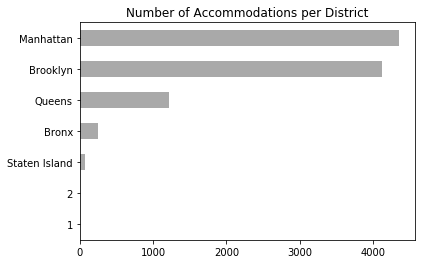

In [0]:
df['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

In [0]:
df.price

0        $190.00
1        $105.00
2        $145.00
3         $79.00
4         $80.00
          ...   
9997      $55.00
9998     $150.00
9999     $220.00
10000    $750.00
10001     $60.00
Name: price, Length: 10002, dtype: object

In [0]:
# clean up the columns (by method chaining)
#print(df[df.price == "2016-07-28"])
#df = df.drop([3363])
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
#df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
#df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
#df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

     Unnamed: 0  ...  reviews_per_month
3363        NaN  ...                NaN

[1 rows x 107 columns]


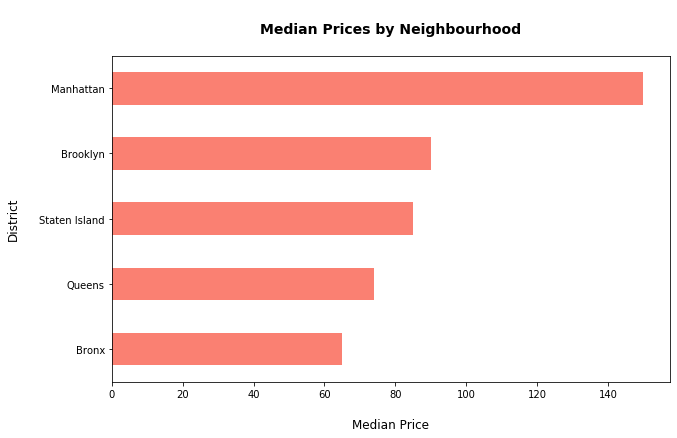

In [0]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

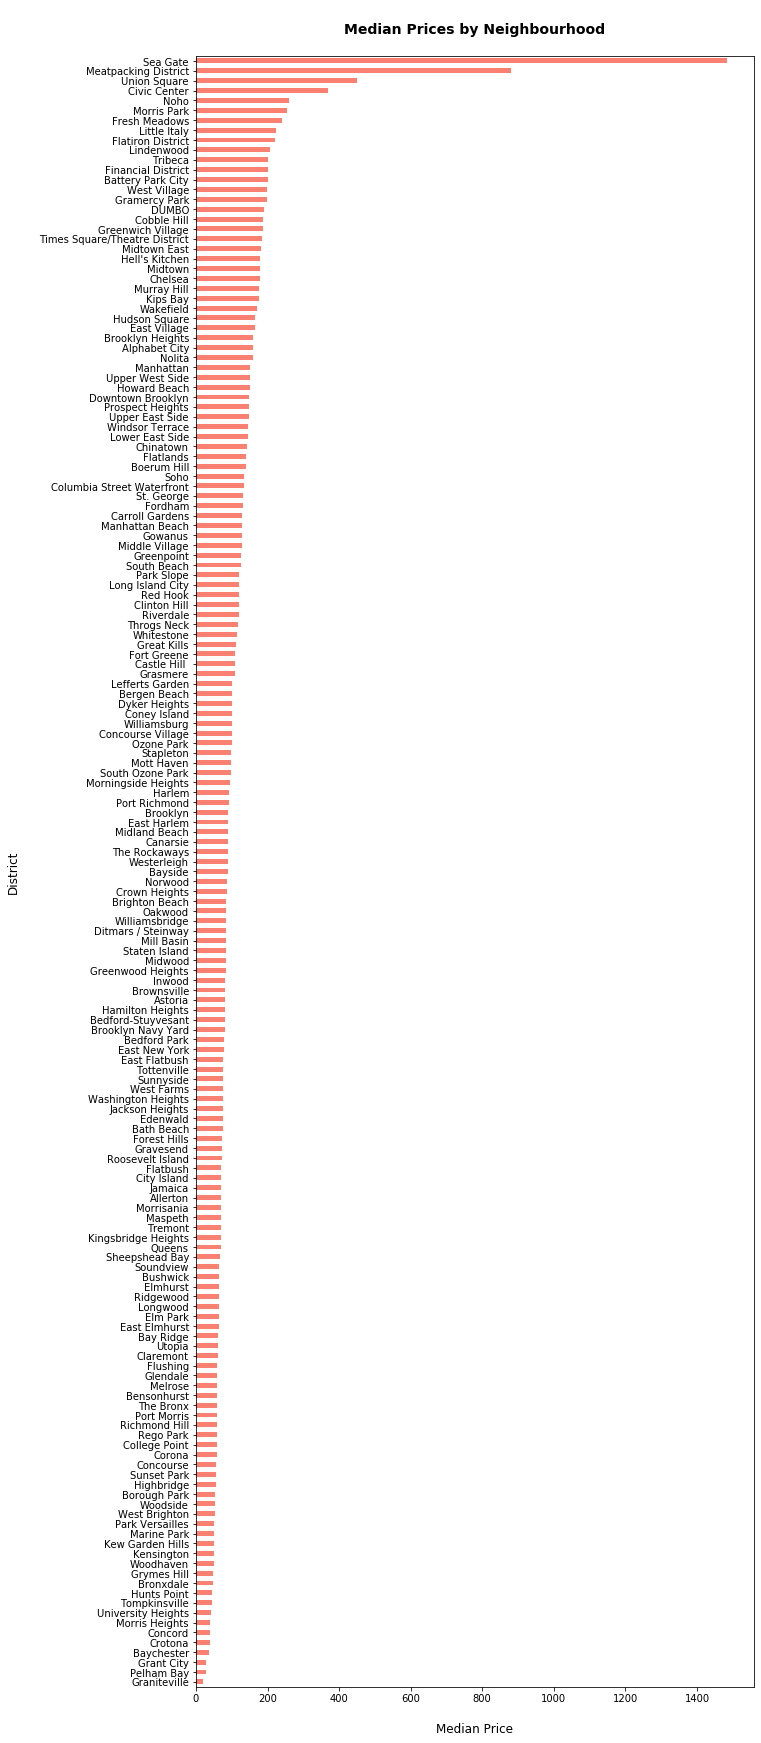

In [0]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(df.groupby(['neighbourhood'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood', y='price', 
                figsize=(10,30), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Neighbourhood\n', fontsize=14, fontweight='bold');

In [0]:
df_summary = df[['summary']].copy()
df_summary.tail(10)

,summary
9992,this is a basement room located in a two family house with private bathroom wifi internet connection there is microwave dinner table fan small portable electric stove coffee our house have security camera this is a cozy clean and comfortable place to be you will basically will be by yourself in the basement we go down to do laundry and get items from storage
9993,welcome to stuyvesant heights this spacious industrial-chic apartment is made up of 4 bedrooms and 1 baths our furnished apartment serves an authentic brooklyn style its stained glass windows ceiling beams exposed brick walls and massive windows brings it all together you’ll find yourself in its beautiful common space with your new crew on a budget
9994,modern apartment 2 bedroom apartment in east village near subway stop sleeps four people
9995,brand new studio with full kitchen that includes subzerio fridge bathroom has glass sliding door shower two very large clothing closets and lots of storage space
9996,well equipped private room can accommodate up to two persons that would like to experience the best part of downtown manhattan and chinatown the room comes with a full size bed an ikea desk and a closet kitchen and bathroom may be shared with other 1-2 guests few minutes walk to east broadway station grand st station bowery station and canal st station near manahattan bridge brooklyn bridge li...
9997,your own one bedroom self contained newly renovated downstairs apt own entrance high ceiling with led lights very bright with large windows lots of sunlight private entrance parking living room has a fireplace that adds warmth and it also provide extra heat for the space queen size bed queen size sofa bed neighborhood is mixed supermarket 2 blocks away lots of shops in walking distance
9998,beautifully furnished sunny and spacious one bedroom in a luxury building in prime williamsburg all to yourself five minutes away from the l and 10 minutes from the g subway you can get to manhattan in half hour but you really don't need to :) you will be next door to some of the trendiest spots in town
9999,spacious 1 bedroom on the borders of soho tribeca and chinatown
10000,exceptionally bright and spacious (with over 30 windows) on a tree lined historic block in the heart of clinton hill this one of a kind 3500+ sqft upper triplex in a two unit brownstone is a modern oasis with understated elegance and high end finishes elegantly spread out over three floors the art filled apt has a loft like feel chef's eat in kitchen spacious dining and living room and large ...
10001,large and bright bedroom in newly renovated luxury apartment steps away from local and express trains 456 only 1 stop to manhattan and 18 min train ride to grand central (20-25 min to times square) enjoy luxury apartment with extra high ceilings and 2 luxury marble bathrooms and modern kitchen with all appliances and cookware 1 min away from closest train station (456 trains) 3 min to manhatt...


In [0]:
df_2 = df[['amenities']].copy()
df_2.amenities.dtypes

dtype('O')

In [0]:
pd.options.display.max_colwidth = 400

In [0]:
# Remove punctuation
df['description'] = df['description'].apply(str)
df['description'] = df['description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['description'] = df['description'].map(lambda x: x.lower()) 
# Print out the first rows of papers
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43630,37186053.0,https://www.airbnb.com/rooms/37186053,2.019120e+13,2019-12-05,"Clean, Calming Retreat in Williamsburg – By Su...","Bright, clean 1 bedroom, just steps from the ...","The building is small, housing just a few unit...",bright clean 1 bedroom just steps from the gr...,none,Ideally located just three stops into Brooklyn...,NaN,"The Graham L is just steps away, at the end of...",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b3a56d91-1...,NaN,1389552,https://www.airbnb.com/users/show/1389552,Nina,2011-11-09,"New York, New York, United States",I am an experience designer and avid traveller!,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/1389552/profi...,https://a0.muscache.com/im/users/1389552/profi...,Williamsburg,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Brooklyn, NY, United States",Williamsburg,...,$0.00,4.0,1125,4.0,4.0,1125,1125,4.0,1125.0,2 weeks ago,t,6.0,6.0,6.0,6.0,2019-12-05,3.0,3.0,2019-08-19,2019-11-08,100.0,10.0,10.0,9.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,0.83
1,22614,19609919.0,https://www.airbnb.com/rooms/19609919,2.019120e+13,2019-12-05,Large Private Room in Duplex- Chelsea,BEAUTIFUL duplex in right in the heart of Chel...,This private room is the bottom floor of the d...,beautiful duplex in right in the heart of chel...,none,The apartment is conveniently located in the h...,NaN,NaN,Guests will have access to the common area spa...,I will be traveling and have a co-host take ca...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8e69a702-a...,NaN,137893214,https://www.airbnb.com/users/show/137893214,Chad,2017-06-30,US,I am a recent graduate of the Zicklin School o...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/89bba...,https://a0.muscache.com/im/pictures/user/89bba...,Chelsea,1.0,1.0,"['email', 'phone']",t,f,"New York, NY, United States",Manhattan,...,$0.00,2.0,1125,2.0,2.0,1125,1125,2.0,1125.0,29 months ago,t,0.0,0.0,0.0,0.0,2019-12-05,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1.0,0.0,1.0,0.0,NaN
2,3306,2144033.0,https://www.airbnb.com/rooms/2144033,2.019120e+13,2019-12-06,Williamsburg - country house in NYC,"No risk, legal Airbnb rental in private reside...","Great location, breakfast included! Located i...",no risk legal airbnb rental in private residen...,none,Williamsburg - Artistic neighborhood with a lo...,"On street parking, but be mindful of alternate...",Very convenient to public transportation. On s...,The room itself is cozy and peaceful with sout...,My husband 

Text Cleaning: remove punctuation + convert to lowercase

In [0]:
import re
# Remove punctuation
df['summary'] = df['summary'].apply(str)
df['summary'] = df['summary'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['summary'] = df['summary'].map(lambda x: x.lower())


In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['description'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

TypeError: ignored

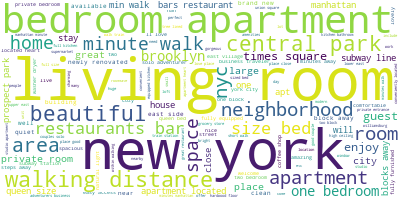

In [0]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['summary'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

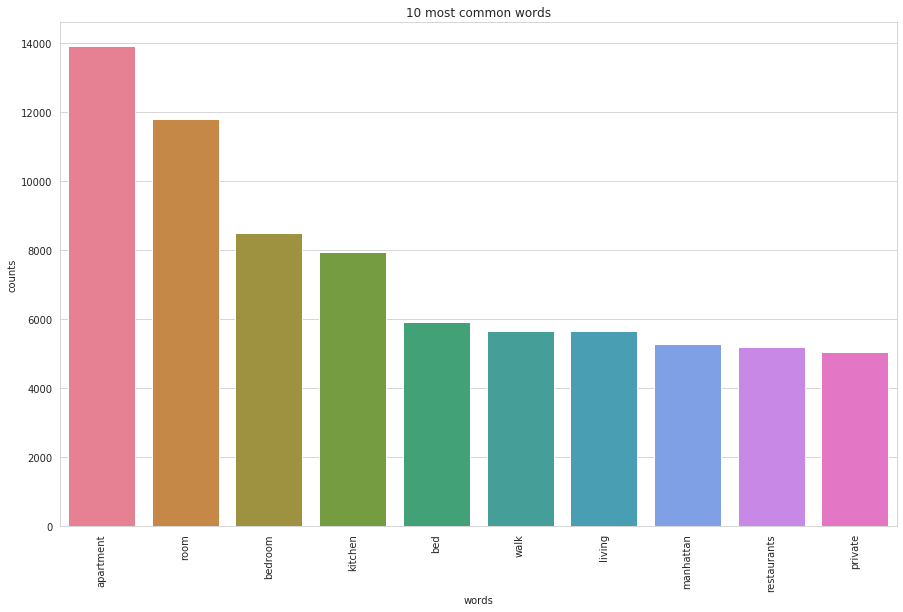

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['description'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

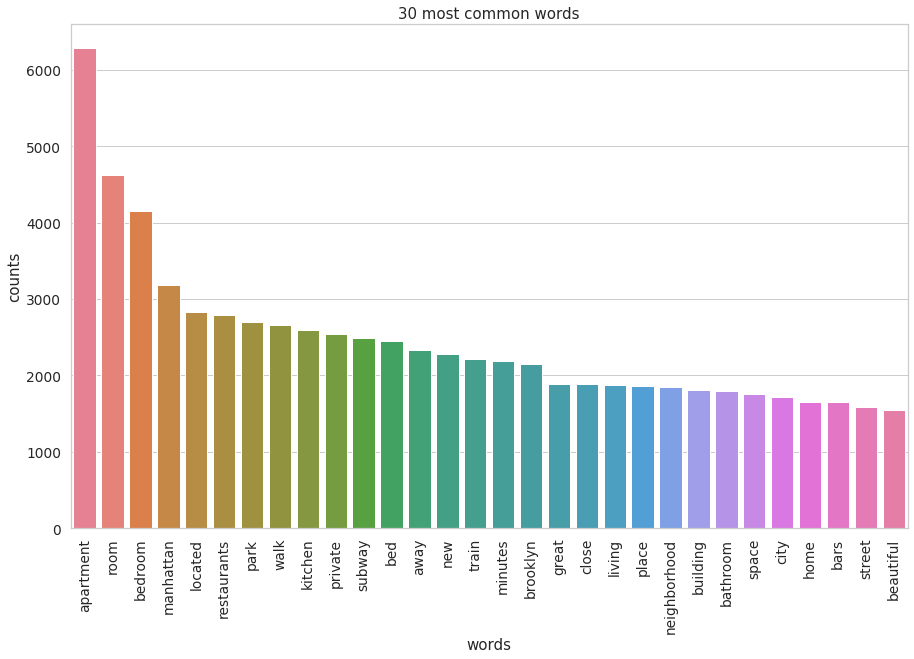

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['summary'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
room bed kitchen bedroom apartment living bathroom private queen large size tv floor space building

Topic #1:
apartment new home bedroom stay york space guests nyc best hotel ll private city room

Topic #2:
place park apartment east square village located close restaurants central city heart location building manhattan

Topic #3:
minutes manhattan walk train subway away park apartment restaurants min located bedroom room 10 minute

Topic #4:
apartment brooklyn restaurants williamsburg bars bedroom neighborhood manhattan located great train walk room heart close


In [0]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 8
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
nan min room private house place beach bathroom

Topic #1:
hotel ve check towels fresh guests bathroom new

Topic #2:
apartment brooklyn bedroom manhattan restaurants room williamsburg bars

Topic #3:
room apartment private bedroom kitchen floor bathroom living

Topic #4:
minutes away train manhattan walk subway restaurants located

Topic #5:
park central square apartment building located restaurants subway

Topic #6:
mins min airport jfk manhattan station train walk

Topic #7:
place apartment east home new travelers love couples

Topic #8:
bed room bedroom kitchen queen apartment size tv

Topic #9:
en la el del casa es que rates


In [0]:
# importing libraries
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim

# prepare the preprocessing
stop = set(stopwords.words('english'))
stop.add("apartment")
stop.add("nyc")
stop.add("place")
stop.add("area")
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
# removing stopwords, punctuations and normalizing the corpus
def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = "".join(token for token in stop_free if token not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

summaries = df['summary'].tolist()

doc_clean = [clean(summary).split() for summary in summaries]
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
corpus = [dictionary.doc2bow(text) for text in doc_clean]
# let LDA find 3 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(0, '0.022*"bedroom" + 0.019*"room" + 0.011*"kitchen" + 0.011*"bed" + 0.011*"private" + 0.010*"2" + 0.010*"block" + 0.010*"located" + 0.009*"floor" + 0.009*"restaurant"')
(1, '0.019*"minute" + 0.016*"manhattan" + 0.015*"park" + 0.014*"train" + 0.013*"min" + 0.013*"subway" + 0.012*"away" + 0.012*"restaurant" + 0.011*"walk" + 0.011*"located"')
(2, '0.023*"room" + 0.012*"bed" + 0.012*"space" + 0.011*"guest" + 0.010*"new" + 0.010*"bathroom" + 0.009*"kitchen" + 0.009*"bedroom" + 0.008*"home" + 0.008*"private"')


In [0]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# uncomment the code if working locally
#ldamodel.save('../input/sentimentData/model3.gensim')

topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.034*"brooklyn" + 0.018*"neighborhood" + 0.015*"close" + 0.015*"couple" + 0.014*"park" + 0.012*"restaurant" + 0.012*"traveler" + 0.012*"great" + 0.011*"business" + 0.011*"good"')
(1, '0.032*"room" + 0.027*"bedroom" + 0.022*"bed" + 0.021*"kitchen" + 0.015*"bathroom" + 0.015*"private" + 0.015*"living" + 0.013*"floor" + 0.012*"full" + 0.011*"large"')
(2, '0.026*"new" + 0.022*"york" + 0.018*"city" + 0.015*"square" + 0.014*"village" + 0.013*"time" + 0.012*"east" + 0.011*"building" + 0.010*"best" + 0.009*"home"')
(3, '0.015*"room" + 0.015*"guest" + 0.013*"please" + 0.012*"stay" + 0.011*"home" + 0.008*"space" + 0.007*"available" + 0.007*"clean" + 0.007*"welcome" + 0.006*"house"')
(4, '0.028*"minute" + 0.026*"train" + 0.021*"walk" + 0.021*"subway" + 0.020*"restaurant" + 0.020*"block" + 0.020*"manhattan" + 0.019*"park" + 0.017*"away" + 0.017*"min"')


In [0]:
#Based on personal observation and result of LDA
location_words=["min","minute","manhattan","park","train","subway","away","restaurant","walk","located","bar","beach"]
facility_words=["room","bed","bedroom","kithen","bathroom","private","large","spacious","luxury","queen"]
#?? adjectives??

In [0]:
def countOccurences(str, word): 
      
    # split the string by spaces in a 
    a = str.split(" ") 
  
    # search for pattern in a 
    count = 0
    for i in range(0, len(a)): 
          
        # if match found increase count  
        if (word == a[i]): 
           count = count + 1
             
    return count   

def countOccurrences2(str,words):
  res=0
  for word in words:
    res+=countOccurences(str,word)
  return res

In [0]:
df['summary_location']=df['summary'].apply(lambda x: countOccurrences2(x,location_words))
df['summary_facility']=df['summary'].apply(lambda x: countOccurrences2(x,facility_words))

In [0]:
df['summary_location']

0       4
1       3
2       1
3       6
4       0
       ..
9995    0
9996    3
9997    0
9998    1
9999    0
Name: summary_location, Length: 10000, dtype: int64

In [0]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 21.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=594c6478a20b5e357407b32716d9aa495520bfe984473af36abc670ed1640be9
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=3ff91d25446c31d74d140b7bfc1dd5bb6855e3fc5464cc669e39a3dd225ed18b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
#explore relation between topics
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'w') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')


KeyboardInterrupt: ignored

In [0]:
import spacy
spacy.load('en')
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [0]:
dfdf = df.copy()
print(df.columns)
dfdf.isnull().sum()[dfdf.isnull().sum() > 1000].index

Index(['Unnamed: 0', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       ...
       'Hair_dryer', 'TV', 'Washer', 'Microwave', 'Shampoo',
       'Free_street_parking', 'Cooking_basics', 'Kitchen', 'Iron',
       'Lock_on_bedroom_door'],
      dtype='object', length=117)


Index(['space', 'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'jurisdiction_names', 'reviews_per_month'],
      dtype='object')

In [0]:
columns_to_keep = ['id', 'space', 'description', 'host_has_profile_pic', 'neighbourhood_group_cleansed', 
                   'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'square_feet', 'price', 'cleaning_fee', 
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy']

In [0]:
df_raw = df[columns_to_keep].set_index('id')
df_raw.isna().sum()


space                           2758
description                      208
host_has_profile_pic              98
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         12
bedrooms                          14
bed_type                           0
amenities                          0
square_feet                     9921
price                              0
cleaning_fee                    2044
security_deposit                3396
extra_people                       0
guests_included                    0
minimum_nights                     0
instant_bookable                   0
is_business_travel_ready           0
cancellation_policy                0
dtype: int64

In [0]:
#how many different room types do we have?
df_raw.room_type.value_counts(normalize=True)

Entire home/apt    0.519304
Private room       0.447089
Shared room        0.025305
Hotel room         0.008302
Name: room_type, dtype: float64

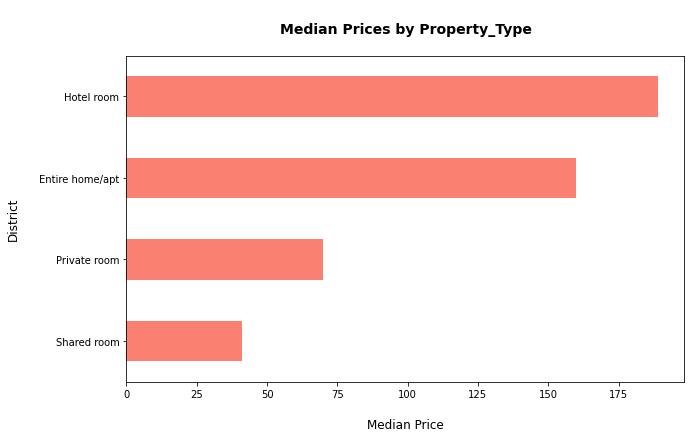

In [0]:
df_grouped = pd.DataFrame(df.groupby(['room_type'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='room_type', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Property_Type\n', fontsize=14, fontweight='bold');

In [0]:
#how many different property types are we up against?
df_raw.property_type.value_counts(normalize=True)

Apartment                 0.788558
House                     0.082517
Townhouse                 0.030706
Condominium               0.030406
Loft                      0.027305
Guest suite               0.010002
Boutique hotel            0.008102
Serviced apartment        0.007301
Hotel                     0.005001
Other                     0.002300
Guesthouse                0.001700
Resort                    0.001300
Hostel                    0.001200
Bed and breakfast         0.000800
Tiny house                0.000500
Camper/RV                 0.000400
Villa                     0.000400
Bungalow                  0.000300
Cottage                   0.000200
Cave                      0.000100
Earth house               0.000100
Aparthotel                0.000100
Yurt                      0.000100
Tent                      0.000100
Barn                      0.000100
Houseboat                 0.000100
Dorm                      0.000100
Boat                      0.000100
Casa particular (Cub

Text(0.5, 1.0, 'Number of Accommodations per District')

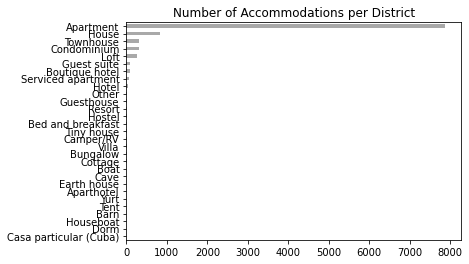

In [0]:
df['property_type'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Property Type')

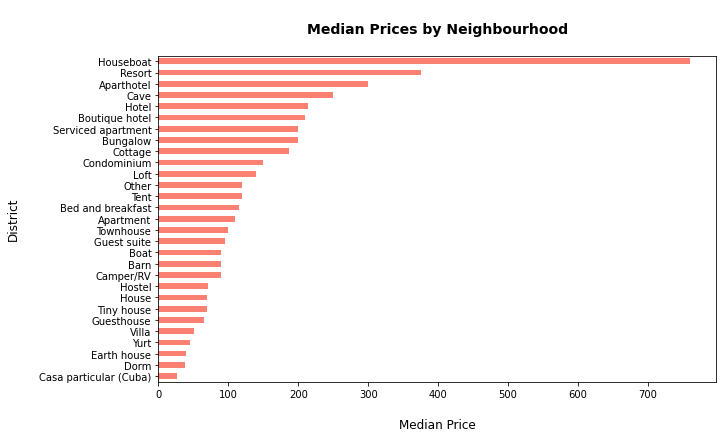

In [0]:
#df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df_grouped = pd.DataFrame(df.groupby(['property_type'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='property_type', y='price', 
                figsize=(10,6), legend=False, color='salmon')

plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nMedian Prices by Property_Type\n', fontsize=14, fontweight='bold');